# Dataset 1 - CSV

In [2]:
import numpy as np
import pandas as pd

In [601]:
df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity.csv")

####  - transformation 1:  remove national based data as we want to isolate data sets to the individual states

In [604]:
toberemoved = ['PR','GU','VI']
df2 = df[~df["LocationAbbr"].isin(toberemoved)]
print(len(df2))

90029


####  - transformation 2:  remove columns with only null values

In [607]:
df3 = df2.drop(columns=['Data_Value_Footnote_Symbol', 'Data_Value_Footnote','Data_Value_Unit'])
print(df3.head())

   YearStart  YearEnd LocationAbbr LocationDesc  \
0       2020     2020           US     National   
2       2013     2013           US     National   
3       2013     2013           US     National   
4       2015     2015           US     National   
6       2012     2012           WY      Wyoming   

                                   Datasource                    Class  \
0  Behavioral Risk Factor Surveillance System        Physical Activity   
2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4  Behavioral Risk Factor Surveillance System        Physical Activity   
6  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   

                          Topic  \
0  Physical Activity - Behavior   
2       Obesity / Weight Status   
3       Obesity / Weight Status   
4  Physical Activity - Behavior   
6       Obesity / Weight Status   

                                     


#### transformation 3:  remove irreliivent data(data value null values)

In [610]:
df3 = df3[df3['Data_Value'].notna()]
print(len(df3))

81649


####  - transformation 4:  eliminate data from years(2020,2021,2022) due to it being skewed due to the covid-19 pandemic

In [613]:
toberemoved = [2020,2021,2022]
df3 = df3[~df3["YearStart"].isin(toberemoved)]
print(len(df3))

67172


#### transformation 5:  update stratification field to match other table down the road

In [712]:
df3.loc[df3.Stratification1 == '$15,000 - $24,999','Stratification1'] = '$15,000-$24,999'
df3.loc[df3.Stratification1 == '$25,000 - $34,999','Stratification1'] = '$25,000-$34,999'
df3.loc[df3.Stratification1 == '$35,000 - $49,999','Stratification1'] = '$35,000-$49,999'
df3.loc[df3.Stratification1 == '$50,000 - $74,999','Stratification1'] = '$50,000+'
df3.loc[df3.Stratification1 == '$75,000 or greater','Stratification1'] = '$50,000+'
df3.loc[df3.Stratification1 == '18 - 24','Stratification1'] = '18-24'
df3.loc[df3.Stratification1 == '25 - 34','Stratification1'] = '25-34'
df3.loc[df3.Stratification1 == '35 - 44','Stratification1'] = '35-44'
df3.loc[df3.Stratification1 == '45 - 54','Stratification1'] = '45-54'
df3.loc[df3.Stratification1 == '55 - 64','Stratification1'] = '55-64'
df3.loc[df3.Stratification1 == '65 or older','Stratification1'] = '65+'
df3.loc[df3.Stratification1 == 'College graduate','Stratification1'] = 'College graduate'
df3.loc[df3.Stratification1 == 'Some college or technical school','Stratification1'] = 'Some post-H.S.'
df3.loc[df3.Stratification1 == 'Less than high school','Stratification1'] = 'Less than H.S.'
df3.loc[df3.Stratification1 == 'High school graduate','Stratification1'] = 'H.S. or G.E.D.'
df3.loc[df3.Stratification1 == 'Non-Hispanic Black','Stratification1'] = 'Black, non-Hispanic'
df3.loc[df3.Stratification1 == 'Asian','Stratification1'] = 'Asian, non-Hispanic'
df3.loc[df3.Stratification1 == 'Non-Hispanic White','Stratification1'] = 'White, non-Hispanic'
df3.loc[df3.Stratification1 == '2 or more races','Stratification1'] = 'Multiracial, non-Hispanic'
df3.loc[df3.Stratification1 == 'American Indian/Alaska Native','Stratification1'] = 'American Indian or Alaskan Native, non-Hispanic'
df3.loc[df3.Stratification1 == 'Hawaiian/Pacific Islander','Stratification1'] = 'Native Hawaiian or other Pacific Islander, non-Hispanic'
df3.loc[df3.Stratification1 == 'Other','Stratification1'] = 'Other, non-Hispanic'
df3.loc[df3.Stratification1 == 'Total','Stratification1'] = 'Overall'



In [715]:
Dataset1 = df3

# Dataset 2 - HTML

In [15]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [16]:
url = 'https://en.wikipedia.org/wiki/Obesity_in_the_United_States'

In [17]:
df = pd.read_html(url,header=None)[1]

#### transformation 1:  fix the headers - we see the header index is multi dimensional and I dont like how that looks so we first reassign the headers to fix this

In [19]:
df.columns = ['State','Obesity rank','adult-mid_2000s','adult_2020','Overweight(incl. obese) adult mid 2000s','obese children mid 2000s']

#### transormation 2: set state as the index value of this dataset - just out of personal preference I set the index to state

In [21]:
df.set_index("State")

,Obesity rank,adult-mid_2000s,adult_2020,Overweight(incl. obese) adult mid 2000s,obese children mid 2000s
State,,,,,
Alabama,5,30.1%,36.3%,65.4%,16.7%
Alaska,9,27.3%,34.2%,64.5%,11.1%
American Samoa,—,—,75%[94],95%[97],35%[94][98]
Arizona,30,23.3%,29.5%,59.5%,12.2%
Arkansas,7,28.1%,35.0%,64.7%,16.4%
California,48,23.1%,25.1%,59.4%,13.2%
Colorado,51,21.0%,22.6%,55.0%,9.9%
Connecticut,42,20.8%,26.9%,58.7%,12.3%
Delaware,23,25.9%,31.8%,63.9%,22.8%


#### transformation 3:  drop the states outside the scope of our data - as discussed with my previous final post we are going to limit the scope of this to just the states

In [23]:
toberemoved = ['American Samoa','Virgin Islands (U.S.)','Puerto Rico','Northern Mariana Islands','Guam','District of Columbia','American Samoa']
df = df[~df["State"].isin(toberemoved)]

#### transformation 4:  search for duplicates - I wanted to verify that the state values did not contain any duplicated values

In [25]:
duplicate_values = df['State'].duplicated()


#### transformation 5:  sort the df by obesity ranking - Again this is just a preference because this will likely be how we will utilize the data, also I am struggling to find more data transformations because this data was rather clean to begin with

In [27]:
df["Obesity rank"] = df["Obesity rank"].apply(pd.to_numeric) 

C:\Users\kings\AppData\Local\Temp\ipykernel_7260\1507827619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Obesity rank"] = df["Obesity rank"].apply(pd.to_numeric)


In [28]:
df.sort_values(by=['Obesity rank'])

,State,Obesity rank,adult-mid_2000s,adult_2020,Overweight(incl. obese) adult mid 2000s,obese children mid 2000s
53,West Virginia,1,30.6%,38.1%,66.8%,20.9%
26,Mississippi,2,34.4%,37.3%,67.4%,17.8%
39,Oklahoma,3,28.1%,36.5%,64.2%,15.4%
17,Iowa,4,26.3%,36.4%,63.4%,12.5%
0,Alabama,5,30.1%,36.3%,65.4%,16.7%
20,Louisiana,6,29.5%,36.2%,64.2%,17.2%
4,Arkansas,7,28.1%,35.0%,64.7%,16.4%
19,Kentucky,8,28.4%,34.3%,66.8%,20.6%
1,Alaska,9,27.3%,34.2%,64.5%,11.1%
44,South Carolina,10,29.2%,34.1%,65.1%,18.9%


In [29]:
Dataset2 = df

# Dataset 3 - API

In [49]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fqb7-mgjf", limit=80000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

### transformation 1 - remove non relevent location values

In [52]:
toBeRemoved = ['District of Columbia','Guam','Puerto Rico','All States and DC (median) **','All States, DC and Territories (median) **','Virgin Islands']

In [54]:
results_df = results_df[~results_df['locationdesc'].isin(toBeRemoved)]

### Transformation 2 - remove covid effected data 2020,2021,2022

In [57]:
toBeRemoved = ['2020','2021','2022']

In [59]:
results_df = results_df[~results_df['year'].isin(toBeRemoved)]

### Transformation 3 - remove irellivent collumns

In [62]:
results_df = results_df.drop(columns =['geolocation','confidence_limit_high','question', 'datasource', 'questionid', 'data_value_type', 'topicid', 'data_value_footnote', 'data_value_footnote_symbol'])


### transformation 4 - remove results with sample size <=100

In [65]:
pd.to_numeric(results_df['sample_size'])

17520     780
17521     192
17522     685
17523     586
17524     950
         ... 
64581      13
64582     640
64583    1100
64584    1276
64585      42
Name: sample_size, Length: 44248, dtype: int64

In [67]:
results_df2 = results_df

In [69]:
results_df2['sample_size'] = pd.to_numeric(results_df['sample_size'])

In [71]:
results_df2 = results_df2[results_df2['sample_size'] > 10]

### transformation 5 - only keep the survey for each state/year/subgroup/ that has the highest sample size

In [74]:
results_df3 = results_df2

In [172]:
results_df3["uniqueid"] = results_df3["locationdesc"] + results_df3["year"] + results_df3["break_out_category"] + results_df3['break_out']

C:\Users\kings\AppData\Local\Temp\ipykernel_7260\3727870664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df3["uniqueid"] = results_df3["locationdesc"] + results_df3["year"] + results_df3["break_out_category"] + results_df3['break_out']


In [174]:
grouped_df = results_df3.groupby(['uniqueid'],group_keys=True)['sample_size'].max()

In [176]:
merged_df = pd.merge(grouped_df,results_df3,on =['uniqueid','sample_size'],how='inner')

In [178]:
Dataset3 = merged_df

# Data Vizualizations

In [86]:
Dataset1.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.8,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.7,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,Value,26.6,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
6,2012,2012,WY,Wyoming,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,48.5,...,"(43.235541343, -108.109830353)",OWS,OWS1,Q037,VALUE,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
7,2012,2012,DC,District of Columbia,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.6,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q036,VALUE,11,Education,Less than high school,EDU,EDUHS


In [977]:
Dataset2.head()

,State,Obesity rank,adult-mid_2000s,adult_2020,Overweight(incl. obese) adult mid 2000s,obese children mid 2000s
0,Alabama,5,30.0,36.0,65.4,16.7
1,Alaska,9,27.0,34.0,64.5,11.1
3,Arizona,30,23.0,29.0,59.5,12.2
4,Arkansas,7,28.0,35.0,64.7,16.4
5,California,48,23.0,25.0,59.4,13.2


In [979]:
Dataset3.head()

,uniqueid,sample_size,break_out,data_value,breakoutid,responseid,breakoutcategoryid,data_value_unit,locationid,display_order,year,locationabbr,classid,break_out_category,topic,class,locationdesc,response,confidence_limit_low
0,Alabama2011Age Group18-24,175,18-24,51.6,AGE01,RESP041,CAT3,%,1,15,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Normal Weight (BMI 18.5-24.9),45.3
1,Alabama2011Age Group25-34,218,25-34,35.2,AGE02,RESP039,CAT3,%,1,17,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),30.5
2,Alabama2011Age Group35-44,316,35-44,35.5,AGE03,RESP039,CAT3,%,1,21,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),31.5
3,Alabama2011Age Group45-54,480,45-54,38.0,AGE04,RESP039,CAT3,%,1,25,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),34.5
4,Alabama2011Age Group55-64,653,55-64,36.4,AGE05,RESP039,CAT3,%,1,29,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),33.4


In [110]:
import sqlite3

In [742]:
conn = sqlite3.connect('final_ms5.db')

connect to the database and write our data frames to sqlite

In [744]:
Dataset1.to_sql(name='csv_data',con=conn, if_exists='replace', index = False)

67172

In [746]:
Dataset2.to_sql(name='html_data',con=conn, if_exists='replace', index = False)

50

In [748]:
Dataset3.to_sql(name='api_data',con=conn, if_exists='replace', index = False)

10869

In [750]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",conn)

,name
0,csv_data
1,html_data
2,api_data


create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

In [927]:
import numpy as np
import matplotlib.pyplot as plt


In [967]:
Dataset2['adult-mid_2000s'] = Dataset2['adult-mid_2000s'].str[:-1]
Dataset2['adult_2020'] = Dataset2['adult_2020'].str[:-1]
Dataset2['Overweight(incl. obese) adult mid 2000s'] = Dataset2['Overweight(incl. obese) adult mid 2000s'].str[:-1]
Dataset2['obese children mid 2000s'] = Dataset2['obese children mid 2000s'].str[:-1]

In [969]:
#Dataset2

In [971]:
Dataset2['adult-mid_2000s'] = pd.to_numeric(Dataset2['adult-mid_2000s']).astype('float')
Dataset2['adult_2020'] = pd.to_numeric(Dataset2['adult_2020']).astype('float')
Dataset2['Overweight(incl. obese) adult mid 2000s'] = pd.to_numeric(Dataset2['Overweight(incl. obese) adult mid 2000s']).astype('float')
Dataset2['obese children mid 2000s'] = pd.to_numeric(Dataset2['obese children mid 2000s']).astype('float')

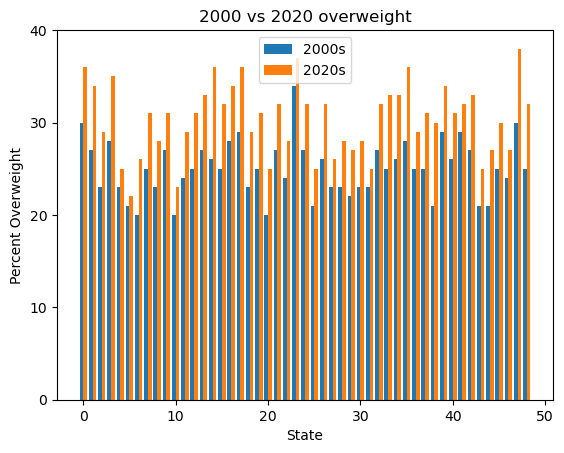

In [975]:
x_axis = np.arange(len(Dataset2["State"]))
plt.bar(x_axis - 0.2, Dataset2["adult-mid_2000s"], 0.4, label = '2000s')
plt.bar(x_axis + 0.2, Dataset2["adult_2020"], 0.4, label = '2020s')
plt.xlabel('State')
plt.ylabel('Percent Overweight')
plt.title('2000 vs 2020 overweight')
plt.yticks(np.arange(0, 41, 10))
plt.legend()
plt.show()

viz 2 - dataset 2 gender breakdown by year in pie form

In [132]:
Dataset1.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [197]:

Dataset3.head()

,uniqueid,sample_size,break_out,data_value,breakoutid,responseid,breakoutcategoryid,data_value_unit,locationid,display_order,year,locationabbr,classid,break_out_category,topic,class,locationdesc,response,confidence_limit_low
0,Alabama2011Age Group18-24,175,18-24,51.6,AGE01,RESP041,CAT3,%,1,15,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Normal Weight (BMI 18.5-24.9),45.3
1,Alabama2011Age Group25-34,218,25-34,35.2,AGE02,RESP039,CAT3,%,1,17,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),30.5
2,Alabama2011Age Group35-44,316,35-44,35.5,AGE03,RESP039,CAT3,%,1,21,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),31.5
3,Alabama2011Age Group45-54,480,45-54,38.0,AGE04,RESP039,CAT3,%,1,25,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),34.5
4,Alabama2011Age Group55-64,653,55-64,36.4,AGE05,RESP039,CAT3,%,1,29,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),33.4


In [261]:
Dataset3_gender = Dataset3[(Dataset3['break_out_category'] == 'Gender') & (Dataset3['locationdesc'] == 'Nebraska')] 

In [273]:
Dataset3_gender = Dataset3_gender[['break_out','data_value','year']]

In [287]:
Dataset3_gender['year'] = pd.to_numeric(Dataset3_gender['year']).astype('Int64')

C:\Users\kings\AppData\Local\Temp\ipykernel_7260\2402833876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset3_gender['year'] = pd.to_numeric(Dataset3_gender['year']).astype('Int64')


In [294]:
Dataset3_gender['data_value'] = pd.to_numeric(Dataset3_gender['data_value']).astype('float')

C:\Users\kings\AppData\Local\Temp\ipykernel_7260\3644859698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset3_gender['data_value'] = pd.to_numeric(Dataset3_gender['data_value']).astype('float')


year
2011    Axes(0.22375,0.11;0.5775x0.77)
2012    Axes(0.22375,0.11;0.5775x0.77)
2013    Axes(0.22375,0.11;0.5775x0.77)
2014    Axes(0.22375,0.11;0.5775x0.77)
2015    Axes(0.22375,0.11;0.5775x0.77)
2016    Axes(0.22375,0.11;0.5775x0.77)
2017    Axes(0.22375,0.11;0.5775x0.77)
2018    Axes(0.22375,0.11;0.5775x0.77)
2019    Axes(0.22375,0.11;0.5775x0.77)
dtype: object

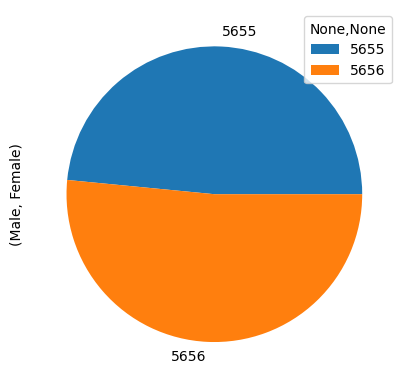

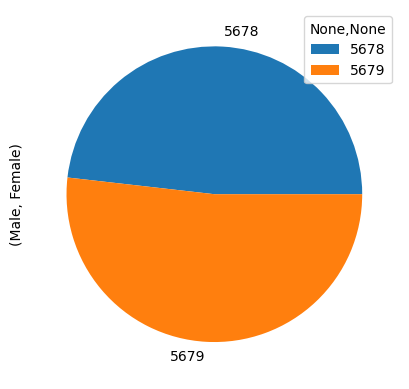

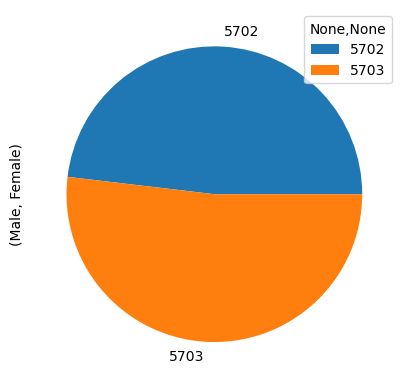

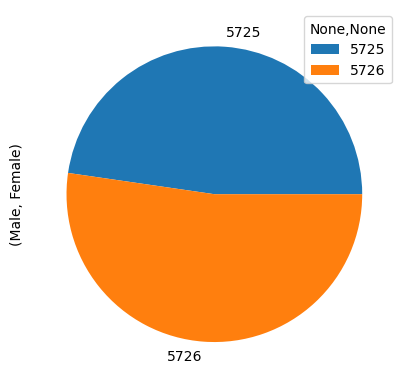

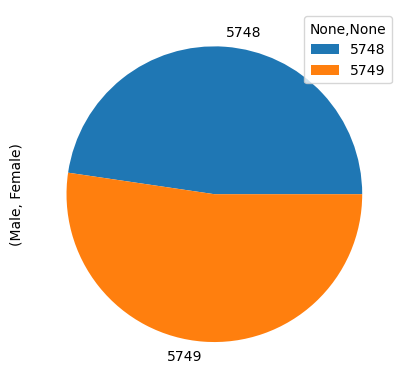

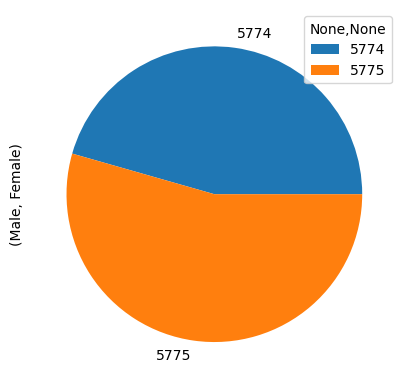

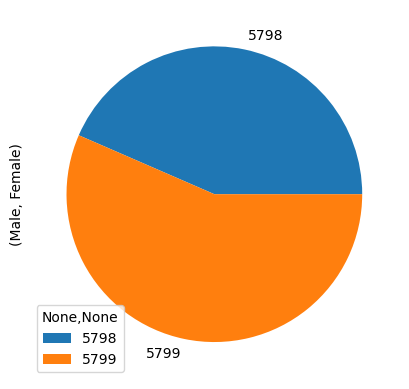

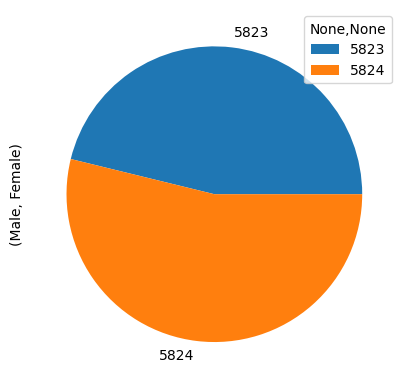

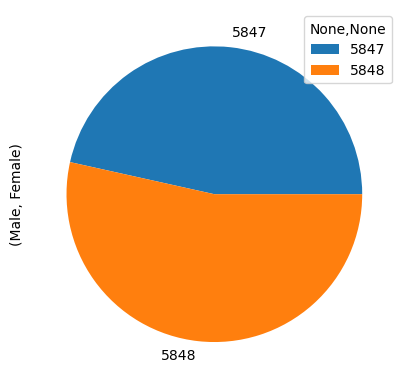

In [921]:
label = 'Male','Female'
Dataset3_gender.groupby(['year']).plot(kind='pie', y='data_value',label = label)

viz 3 - dataset 3 breakdown of gender obesity (for entire us if possible) or pick a state or average the perccentages/add the recipients and calculate percentage (im thinkign a pie chart)


In [150]:
Dataset3.head()

,uniqueid,sample_size,break_out,data_value,breakoutid,responseid,breakoutcategoryid,data_value_unit,locationid,display_order,year,locationabbr,classid,break_out_category,topic,class,locationdesc,response,confidence_limit_low
0,Alabama2011Age Group,950,65+,39.0,AGE09,RESP040,CAT3,%,1,34,2011,AL,CLASS14,Age Group,BMI Categories,Overweight and Obesity (BMI),Alabama,Overweight (BMI 25.0-29.9),36.6
1,Alabama2011Education Attained,835,H.S. or G.E.D.,34.1,EDUCA2,RESP040,CAT5,%,1,62,2011,AL,CLASS14,Education Attained,BMI Categories,Overweight and Obesity (BMI),Alabama,Overweight (BMI 25.0-29.9),31.4
2,Alabama2011Gender,1591,Female,31.8,SEX2,RESP039,CAT2,%,1,9,2011,AL,CLASS14,Gender,BMI Categories,Overweight and Obesity (BMI),Alabama,Obese (BMI 30.0 - 99.8),29.9
3,Alabama2011Household Income,722,"$50,000+",37.5,INCOME5,RESP040,CAT6,%,1,90,2011,AL,CLASS14,Household Income,BMI Categories,Overweight and Obesity (BMI),Alabama,Overweight (BMI 25.0-29.9),34.6
4,Alabama2011Overall,2529,Overall,34.7,BO1,RESP040,CAT1,%,1,2,2011,AL,CLASS14,Overall,BMI Categories,Overweight and Obesity (BMI),Alabama,Overweight (BMI 25.0-29.9),33.1


viz 4&5 - dataset 1 and 3 (something)

In [304]:
Dataset1.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [310]:
Dataset1.StratificationCategory1.unique()

array(['Income', 'Race/Ethnicity', 'Education', 'Age (years)', 'Gender',
       'Total'], dtype=object)

In [364]:
Dataset1_income = Dataset1[(Dataset1['StratificationCategory1'] == 'Income') & (Dataset1['Stratification1'] != 'Data not reported') & (Dataset1['LocationAbbr'] == 'US') & (Dataset1['Topic'] == 'Obesity / Weight Status') & (Dataset1['QuestionID'] == 'Q036')]



In [368]:
Dataset1_income.sort_values(by=['YearStart'])

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
19797,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.5,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$25,000 - $34,999",INC,INC2535
68,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.3,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
1342,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,22.8,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$75,000 or greater",INC,INC75PLUS
12182,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.3,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$15,000 - $24,999",INC,INC1525
3468,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.7,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$35,000 - $49,999",INC,INC3550
6746,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.4,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
11635,2012,2012,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,23.4,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$75,000 or greater",INC,INC75PLUS
16376,2012,2012,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.2,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$25,000 - $34,999",INC,INC2535
11108,2012,2012,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.6,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$15,000 - $24,999",INC,INC1525
10587,2012,2012,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.9,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075


In [ ]:
#want to stack line charts showing progession of each category by year

In [1001]:
Dataset1_Income_Trimmed = Dataset1_income[['YearStart','Data_Value','Stratification1']]

In [1003]:
df1 = Dataset1_Income_Trimmed[(Dataset1_Income_Trimmed['Stratification1'] == 'Less than $15,000')]

In [1005]:
df2 = Dataset1_Income_Trimmed[(Dataset1_Income_Trimmed['Stratification1'] == '$15,000 - $24,999')]

In [1007]:
df3 = Dataset1_Income_Trimmed[(Dataset1_Income_Trimmed['Stratification1'] == '$25,000 - $34,999')]

In [1009]:
df4 = Dataset1_Income_Trimmed[(Dataset1_Income_Trimmed['Stratification1'] == '$35,000 - $49,999')]

In [1011]:
df5 = Dataset1_Income_Trimmed[(Dataset1_Income_Trimmed['Stratification1'] == '$50,000 - $74,999')]

In [1013]:
df6 = Dataset1_Income_Trimmed[(Dataset1_Income_Trimmed['Stratification1'] == '$75,000 or greater')]

In [1015]:
df6

,YearStart,Data_Value,Stratification1
1342,2011,22.8,"$75,000 or greater"
2937,2018,27.4,"$75,000 or greater"
11635,2012,23.4,"$75,000 or greater"
13850,2013,23.9,"$75,000 or greater"
17536,2014,25.1,"$75,000 or greater"
18767,2015,24.6,"$75,000 or greater"
32924,2017,26.0,"$75,000 or greater"
45549,2019,28.3,"$75,000 or greater"
80253,2016,25.4,"$75,000 or greater"


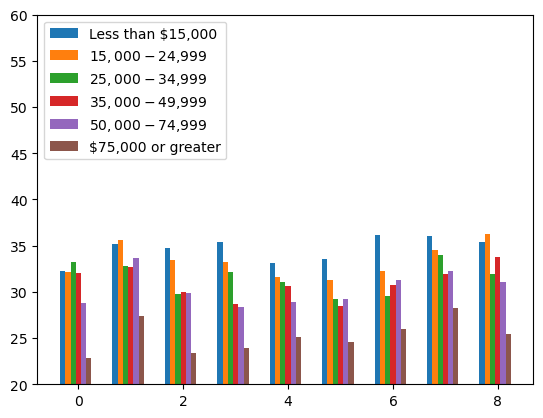

In [1023]:



x_axis = np.arange(len(df1["YearStart"]))
plt.bar(x_axis - 0.3, df1["Data_Value"], 0.1, label = 'Less than $15,000')
plt.bar(x_axis - 0.2, df2["Data_Value"], 0.1, label = '$15,000 - $24,999')
plt.bar(x_axis - 0.1, df3["Data_Value"], 0.1, label = '$25,000 - $34,999')
plt.bar(x_axis , df4["Data_Value"], 0.1, label = '$35,000 - $49,999')
plt.bar(x_axis + 0.1, df5["Data_Value"], 0.1, label = '$50,000 - $74,999')
plt.bar(x_axis + 0.2, df6["Data_Value"], 0.1, label = '$75,000 or greater')
plt.legend(loc="upper left")
plt.ylim(20, 60)

plt.show()

create the combined dataset 

In [989]:
combined_df = pd.read_sql_query('''select df1.*,
df3.year as 'df3-year',
df3.locationdesc as 'df3-locationdesc',
df3.break_out as 'df3-break_out',
df3.data_value as 'df3-data_value',df2.*




 
                    from csv_data df1 
                    inner join api_data df3 on df1.YearSTart = df3.year
                                and df1.LocationDesc = df3.locationdesc
                                and df1.Stratification1 = df3.break_out
                    left join html_data df2 on df2.state = df1.LocationDesc

                  ''',conn)

In [991]:
combined_df.columns 

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1',
       'df3-year', 'df3-locationdesc', 'df3-break_out', 'df3-data_value',
       'State', 'Obesity rank', 'adult-mid_2000s', 'adult_2020',
       'Overweight(incl. obese) adult mid 2000s', 'obese children mid 2000s'],
      dtype='object')

In [993]:
combined_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,df3-year,df3-locationdesc,df3-break_out,df3-data_value,State,Obesity rank,adult-mid_2000s,adult_2020,Overweight(incl. obese) adult mid 2000s,obese children mid 2000s
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,35.2,...,2011,Alabama,25-34,35.2,Alabama,5,30.1%,36.3%,65.4%,16.7%
1,2015,2015,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,40.2,...,2015,Rhode Island,Hispanic,40.2,Rhode Island,29,21.4%,30.0%,60.4%,11.9%
2,2012,2012,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,32.3,...,2012,Wyoming,"Less than $15,000",43.6,Wyoming,34,24.0%,28.8%,61.7%,8.7%
3,2011,2011,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.1,...,2011,Rhode Island,"Other, non-Hispanic",45.3,Rhode Island,29,21.4%,30.0%,60.4%,11.9%
4,2017,2017,NJ,New Jersey,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,Value,19.8,...,2017,New Jersey,"Other, non-Hispanic",28.7,New Jersey,41,22.9%,27.3%,60.5%,13.7%


viz 4: compare the distribution between the data value from dataset1 and dataset3 for a specific case

In [875]:
 filtered_cdf = combined_df[['YearStart','LocationDesc','StratificationCategory1','Stratification1','Data_Value','df3-data_value']]

In [877]:
filtered_cdf= filtered_cdf[(filtered_cdf['LocationDesc'] == 'Texas') & (filtered_cdf['Stratification1'] == 'Hispanic')]

In [887]:
filtered_cdf= filtered_cdf[['Data_Value','df3-data_value']]

In [893]:
filtered_cdf['Data_Value'] = pd.to_numeric(filtered_cdf['Data_Value']).astype('float')

In [895]:
filtered_cdf['df3-data_value'] = pd.to_numeric(filtered_cdf['df3-data_value']).astype('float')

In [897]:
def percCal(x,y):
  return (x-y)*100/x

In [899]:
filtered_cdf['diff'] = percCal(filtered_cdf['Data_Value'],filtered_cdf['df3-data_value'])

<Axes: ylabel='Density'>

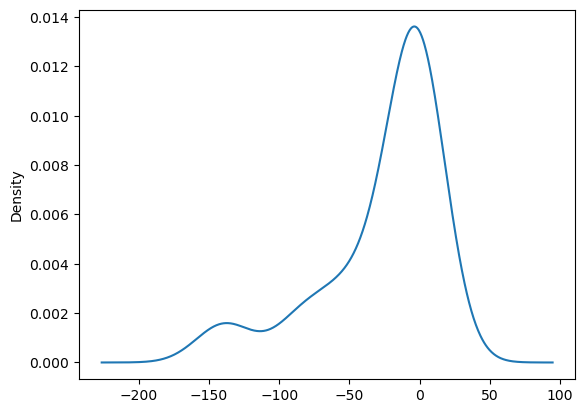

In [901]:
filtered_cdf['diff'].plot(kind='density')

compare the data field value between the df1 and df3 looking at the df3 largest survey compared to the multiple surveys of df1

In [907]:
filtered_cdf=filtered_cdf[['Data_Value','df3-data_value']]

(array([[ 4.,  2.,  3.,  5.,  0.,  4.,  6., 18.,  7.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 32., 19.,  0.]]),
 array([15.2 , 18.04, 20.88, 23.72, 26.56, 29.4 , 32.24, 35.08, 37.92,
        40.76, 43.6 ]),
 <a list of 2 BarContainer objects>)

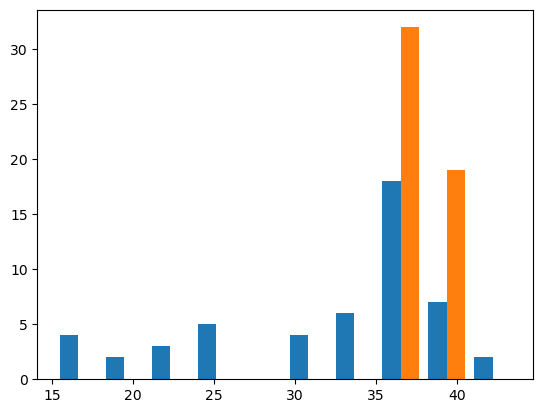

In [909]:
plt.hist(filtered_cdf)

- Are there any legal or regulatory guidelines for your data or project tropic?
I don't feel there are any guidelines to abide by aside from the assumption that this data was gathered ethically
- What risks could be created based on the transformations done?
I don't think any major risks should be created.  The only potential risks I see are limiting the survey results that we are looking at may have skewed the data in some way.
 - Did you make any assumptions in cleaning/transforming the data?
Again I made the assumption that the data would not be skewed too much based on the largest survey for those sub groups.
 - How was your data Sourced/verified for credibility?
This data was sourced through the CDC.  Being from a government agency, I assume they are regulated to the point that the data is credible.
 - Was your data acquired in an ethical way?
Again, I certainly hope so with it being gathered by a government agency.
 - how would you mitigate any ethical implications you identified?
I would find a way to create a set of rules for limiting the data sets instead of just doing it blindly based on the largest survey for each group.  I think there has to be a better way to do this but I'm not sure what that would be.  



In [1044]:
combined_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,...,df3-year,df3-locationdesc,df3-break_out,df3-data_value,State,Obesity rank,adult-mid_2000s,adult_2020,Overweight(incl. obese) adult mid 2000s,obese children mid 2000s
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,35.2,...,2011,Alabama,25-34,35.2,Alabama,5,30.1%,36.3%,65.4%,16.7%
1,2015,2015,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,40.2,...,2015,Rhode Island,Hispanic,40.2,Rhode Island,29,21.4%,30.0%,60.4%,11.9%
2,2012,2012,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,32.3,...,2012,Wyoming,"Less than $15,000",43.6,Wyoming,34,24.0%,28.8%,61.7%,8.7%
3,2011,2011,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.1,...,2011,Rhode Island,"Other, non-Hispanic",45.3,Rhode Island,29,21.4%,30.0%,60.4%,11.9%
4,2017,2017,NJ,New Jersey,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,Value,19.8,...,2017,New Jersey,"Other, non-Hispanic",28.7,New Jersey,41,22.9%,27.3%,60.5%,13.7%
